In [141]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython import display


In [142]:
dataset = pd.read_csv("../data/filtered_data_IEDB_4_tested_len_9_10_full_HLA.csv",index_col=0)
dataset

,peptide,HLA_allele,immunogenicity,tested_subjects,positive_subjects
5,AAGIGILTV,HLA-A*02:01,0.833333,4.0,4.0
6,AALFFFDID,HLA-A*02:01,0.250000,10.0,2.0
10,AAVKAGAAL,HLA-B*07:02,0.750000,2.0,2.0
25,ADVEFCLSL,HLA-B*44:03,0.500000,6.0,3.0
125,AELEGVWQPA,HLA-B*40:06,0.666667,1.0,1.0
...,...,...,...,...,...
27637,FTGSEVENV,HLA-A*02:01,0.083333,10.0,0.0
27638,FTSHEHFGL,HLA-A*02:01,0.083333,10.0,0.0
27667,MQVIGDQYV,HLA-A*02:01,0.083333,10.0,0.0
27685,SQEPMSIYV,HLA-A*02:01,0.083333,10.0,0.0


## Distrobution of immunogenecity scores

In [143]:
dataset.immunogenicity.describe()

count    5543.000000
mean        0.235154
std         0.228096
min         0.014493
25%         0.083333
50%         0.142857
75%         0.297727
max         0.954545
Name: immunogenicity, dtype: float64

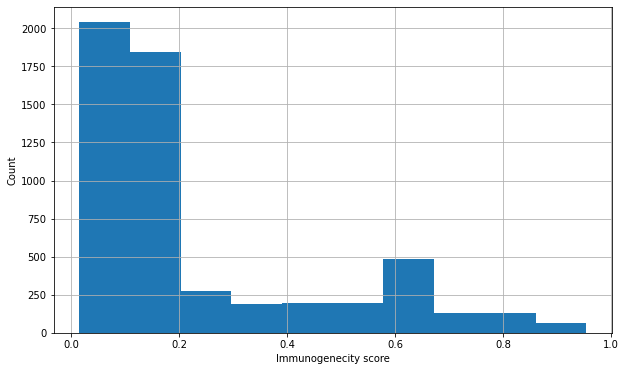

In [144]:
fig = plt.figure(figsize=(10,6))
dataset.immunogenicity.hist()
plt.xlabel("Immunogenecity score")
plt.ylabel("Count")
plt.show()

## Distrobution of HLA-Alleles

In [145]:
dataset.HLA_allele.describe()

count            5543
unique             86
top       HLA-A*02:01
freq             2116
Name: HLA_allele, dtype: object

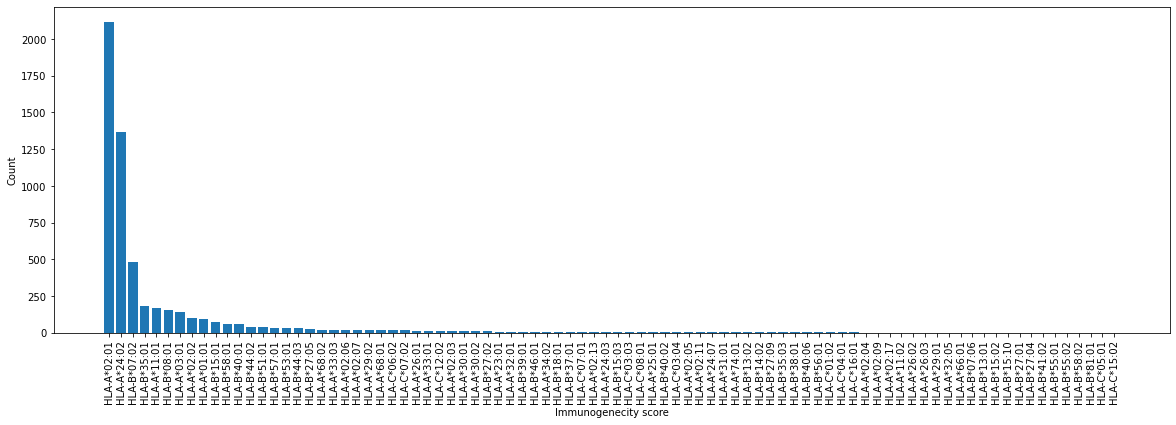

In [146]:
unique_HLAs, counts = np.unique(dataset.HLA_allele,return_counts=True)
HLA_count_dict = {hla:count for hla,count in zip(unique_HLAs, counts) }

sorted_HLAs = sorted(HLA_count_dict.keys(),key=lambda x: HLA_count_dict[x], reverse=True) 
sorted_counts = [HLA_count_dict[x] for x in sorted_HLAs]

fig = plt.figure(figsize=(20,6))
plt.bar(np.arange(len(unique_HLAs)),sorted_counts)
plt.xticks(np.arange(len(unique_HLAs)),sorted_HLAs,rotation=90)
plt.xlabel("Immunogenecity score")
plt.ylabel("Count")
plt.show()

## Length distrobution

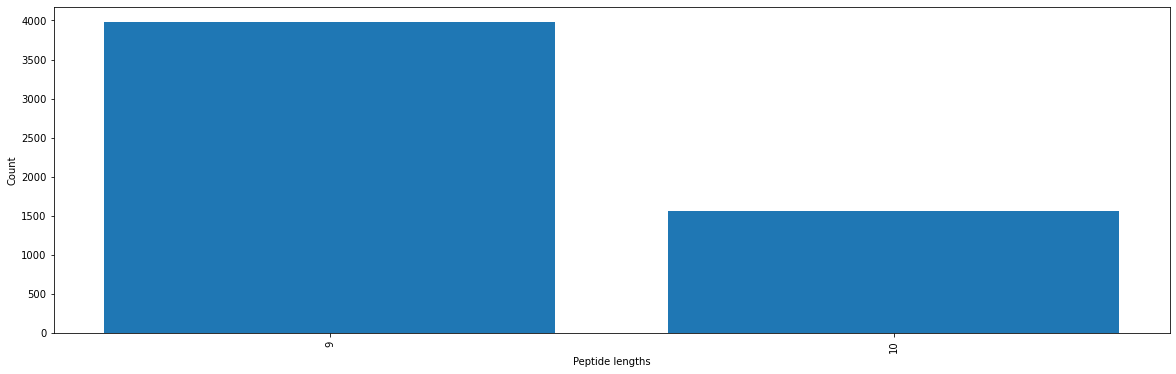

In [147]:
dataset["pep_len"] = [len(x) for x in dataset["peptide"]]
unique_lens, counts = np.unique(dataset.pep_len,return_counts=True)

fig = plt.figure(figsize=(20,6))
plt.bar(np.arange(len(unique_lens)),counts)
plt.xticks(np.arange(len(unique_lens)),unique_lens,rotation=90)
plt.xlabel("Peptide lengths")
plt.ylabel("Count")
plt.show()


## Analysing peptide properties

In [151]:
len_peptides = 10 
immunogenic = dataset["peptide"][(dataset["immunogenicity"] > 0.7) & (dataset["pep_len"] == len_peptides)]
non_immunogenic = dataset["peptide"][(dataset["immunogenicity"] < 0.2) & (dataset["pep_len"] == len_peptides)]

In [152]:
immunogenic_pos = pd.DataFrame.from_records([list(x) for x in immunogenic],columns=range(1,len_peptides +1))
non_immunogenic_pos = pd.DataFrame.from_records([list(x) for x in non_immunogenic],columns=range(1,len_peptides +1))

In [153]:
non_immunogenic_pos

,1,2,3,4,5,6,7,8,9,10
0,D,F,K,T,W,L,Q,S,K,L
1,G,E,S,R,K,T,F,V,E,L
2,G,I,V,C,P,I,C,S,Q,K
3,G,L,L,G,C,I,I,T,S,L
4,G,L,S,P,T,V,W,L,S,V
...,...,...,...,...,...,...,...,...,...,...
1044,F,L,Y,E,N,A,F,L,P,F
1045,K,Q,L,I,K,V,T,L,V,F
1046,L,V,Q,M,A,P,I,S,A,M
1047,M,V,M,F,T,P,L,V,P,F


In [154]:
properties = pd.read_csv("../data/props.csv",index_col=0)
properties

,A,G,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T
props,,,,,,,,,,,,,,,,,,,,
AA,A,G,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T
AA_num_key,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
AA_num_key_new,-0.15,-0.1,-0.95,-0.85,-0.45,-0.5,0.85,0.65,0.95,0.55,-0.4,-0.9,-1.0,0.5,0.1,0.75,0.9,0.7,1.0,0.45
charge_key,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-0.048,0.0,0.091,1.0,0.0,-1.0,0.0
hydrophobicity,0.33,1.14,-0.69,-0.44,-0.58,-0.24,1.81,0.19,1.61,0.33,-0.31,-0.53,-0.81,0.22,0.23,1.37,1.0,0.43,2.41,0.11
bulk,0.13721290451959514,0.1099971218049647,0.2165922707706006,0.2302001621279158,0.25854993578898916,0.29937360986093486,0.26081791768187507,0.2426740625387881,0.2426740625387881,0.1621607053413397,0.17463460575221199,0.18710850616308428,0.22112823455637232,0.16783066007355438,0.28916769134294845,0.24494204443167397,0.30050760080737776,0.21205630698482886,0.21205630698482886,0.1848405242701984
flex,0.984,1.031,0.935,0.952,0.915,0.904,1.102,1.037,1.094,1.046,1.049,0.931,0.927,0.906,0.929,0.95,1.008,1.048,1.068,0.997


In [155]:
def encode_dataframe(df,property_df):
    property_profiles = dict()
    for property in properties.index:
        property_profiles[property] = dict()
        for i,peptide in df.iterrows():
            property_profiles[property][i] = []
            for pos in peptide:
                try:
                    property_profiles[property][i].append(properties.loc[property][pos])

                except KeyError:
                    if property == "AA":
                        property_profiles[property][i].pos("-")
                    else:
                        property_profiles[property][i].pos(0)
    return property_profiles

property_profile_immunogenic = encode_dataframe(immunogenic_pos,properties)
property_profile_non_immunogenic = encode_dataframe(non_immunogenic_pos,properties)


Text(0, 0.5, 'Hydrophobicity')

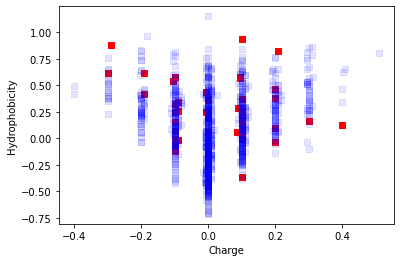

In [156]:
charge_scores_immunogenic = pd.DataFrame.from_dict(property_profile_immunogenic["charge_key"]).astype('float')
hydrophobicity_scores_immunogenic = pd.DataFrame.from_dict(property_profile_immunogenic["hydrophobicity"]).astype('float')

charge_scores_non_immunogenic = pd.DataFrame.from_dict(property_profile_non_immunogenic["charge_key"]).astype('float')
hydrophobicity_scores_non_immunogenic = pd.DataFrame.from_dict(property_profile_non_immunogenic["hydrophobicity"]).astype('float')

plt.plot(charge_scores_immunogenic.mean(axis=0),hydrophobicity_scores_immunogenic.mean(axis=0),marker="s",ls="",color="red",alpha=1)
plt.plot(charge_scores_non_immunogenic.mean(axis=0),hydrophobicity_scores_non_immunogenic.mean(axis=0),marker="s",ls="",color="blue",alpha=0.1)

plt.xlabel("Charge")
plt.ylabel("Hydrophobicity")

Text(0, 0.5, 'bulk')

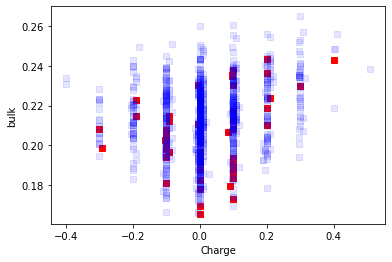

In [157]:
charge_scores_immunogenic = pd.DataFrame.from_dict(property_profile_immunogenic["charge_key"]).astype('float')
bulk_scores_immunogenic = pd.DataFrame.from_dict(property_profile_immunogenic["bulk"]).astype('float')

charge_scores_non_immunogenic = pd.DataFrame.from_dict(property_profile_non_immunogenic["charge_key"]).astype('float')
bulk_scores_non_immunogenic = pd.DataFrame.from_dict(property_profile_non_immunogenic["bulk"]).astype('float')

plt.plot(charge_scores_immunogenic.mean(axis=0),bulk_scores_immunogenic.mean(axis=0),marker="s",ls="",color="red",alpha=1)
plt.plot(charge_scores_non_immunogenic.mean(axis=0),bulk_scores_non_immunogenic.mean(axis=0),marker="s",ls="",color="blue",alpha=0.1)

plt.xlabel("Charge")
plt.ylabel("bulk")

Text(0, 0.5, 'flex')

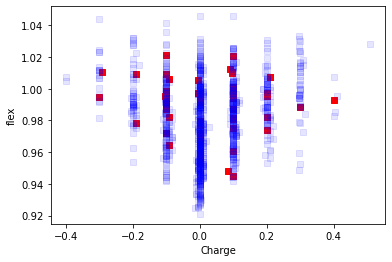

In [158]:
charge_scores_immunogenic = pd.DataFrame.from_dict(property_profile_immunogenic["charge_key"]).astype('float')
flex_scores_immunogenic = pd.DataFrame.from_dict(property_profile_immunogenic["flex"]).astype('float')

charge_scores_non_immunogenic = pd.DataFrame.from_dict(property_profile_non_immunogenic["charge_key"]).astype('float')
flex_scores_non_immunogenic = pd.DataFrame.from_dict(property_profile_non_immunogenic["flex"]).astype('float')

plt.plot(charge_scores_immunogenic.mean(axis=0),flex_scores_immunogenic.mean(axis=0),marker="s",ls="",color="red",alpha=1)
plt.plot(charge_scores_non_immunogenic.mean(axis=0),flex_scores_non_immunogenic.mean(axis=0),marker="s",ls="",color="blue",alpha=0.1)

plt.xlabel("Charge")
plt.ylabel("flex")

## Sequence logos of immunogenic and non-immunogenic peptides

In [160]:
immunogenic.to_csv("../data/immunogenic_peptides_10.csv",index=False)
non_immunogenic.to_csv("../data/non_immunogenic_peptides_10.csv",index=False)

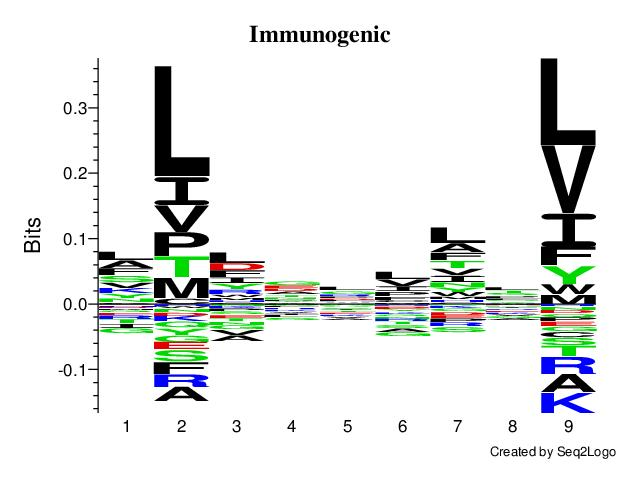

In [163]:
display.Image("../figs/immunogenic_logo_plot.jpeg")

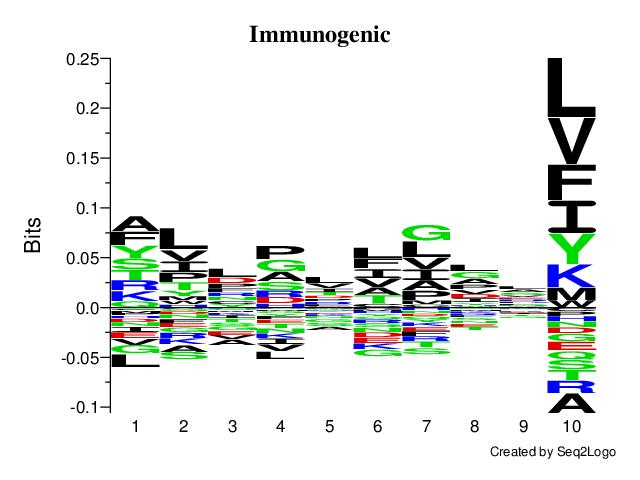

In [164]:
display.Image("../figs/immunogenic_logo_plot_10.jpeg")

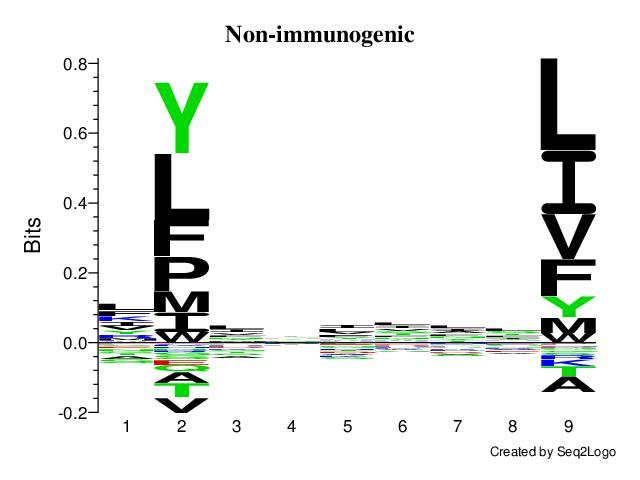

In [165]:
display.Image("../figs/non_immunogenic_logo_plot.jpeg")

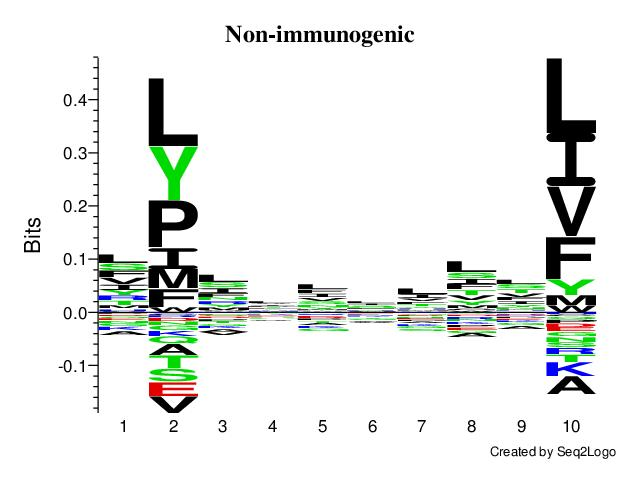

In [166]:
display.Image("../figs/non_immunogenic_logo_plot_10.jpeg")

In [168]:
immunogenic = dataset["peptide"][(dataset["immunogenicity"] > 0.7)]
non_immunogenic = dataset["peptide"][(dataset["immunogenicity"] < 0.2)]

In [172]:
non_immunogenic.to_csv("../data/non_immunogenic_peptides_all.csv",index=False)

In [173]:
immunogenic.to_csv("../data/immunogenic_peptides_all.csv",index=False)

In [ ]:
# https://services.healthtech.dtu.dk/service.php?GibbsCluster-2.0